In [315]:
import networkx as nx
import requests
import matplotlib as plt
import powerlaw

In [316]:
url = 'https://www.ia.pw.edu.pl/~mkamola/dataset-big/4.txt'
r = requests.get(url, allow_redirects=True)
open('4.txt', 'wb').write(r.content)

185860

Zbadaj jaki jest rząd i rozmiar całej sieci: pierwotnej oraz po usunięciu pętli i duplikatów krawędzi (1);

In [317]:

G_multi = nx.read_edgelist("4.txt", create_using=nx.MultiGraph)
G = nx.read_edgelist("4.txt", create_using=nx.Graph)

In [318]:
I1 = nx.info(G_multi) 
print(I1 + '\n')
I2 = nx.info(G) 
print(I2 + '\n')

Name: 
Type: MultiGraph
Number of nodes: 6988
Number of edges: 5537
Average degree:   1.5847

Name: 
Type: Graph
Number of nodes: 6988
Number of edges: 5537
Average degree:   1.5847



In [319]:
nx.number_of_selfloops(G_multi)

256

In [320]:
nx.number_of_selfloops(G)

256

In [321]:
G_multi=nx.Graph(G_multi)
G_multi.remove_edges_from(nx.selfloop_edges(G_multi))
G.remove_edges_from(nx.selfloop_edges(G))

In [322]:
nx.number_of_selfloops(G_multi)

0

In [323]:
nx.number_of_selfloops(G)

0

In [324]:
N1 = nx.info(G_multi) 
print(N1 + '\n')
N2 = nx.info(G) 
print(N2 + '\n')

Name: 
Type: Graph
Number of nodes: 6988
Number of edges: 5281
Average degree:   1.5114

Name: 
Type: Graph
Number of nodes: 6988
Number of edges: 5281
Average degree:   1.5114



Wyodrębnij największą składową spójną, zbadaj jej rząd i rozmiar (1);

In [325]:
nx.is_connected(G)

False

In [326]:
nx.is_connected(G_multi)

False

In [327]:
Set = [len(c) for c in sorted(nx.connected_components(G_multi), key=len, reverse=True)]

In [328]:
largest_cc = max(nx.connected_components(G_multi), key=len)
G_biggest=G_multi.subgraph(largest_cc)
Inf = nx.info(G_biggest)
print(Inf)

Name: 
Type: Graph
Number of nodes: 626
Number of edges: 742
Average degree:   2.3706


In [329]:
nx.number_of_nodes(G_biggest)

626

In [330]:
nx.number_of_edges(G_biggest)

742

Wyznacz aproksymacje średniej długości ścieżki, operując na próbie losowej 100, 1000 i 10 tys. par wierzchołków (2);

In [331]:
import random


In [347]:
n_set = [200, 310, 620]
random_graph=[None] * len(n_set)
create_graph=[None] * len(n_set)
for i in n_set:
    random_graph = random.sample(G_biggest.nodes, i)
    create_graph = G_multi.subgraph(random_graph)
    lar_cc = max(nx.connected_components(create_graph), key=len)
    G_big=create_graph.subgraph(lar_cc)
    print(nx.info(G_big))
    try:
        ave = nx.average_shortest_path_length(G_big)
        print(i,ave)   
    except nx.NetworkXError:
        print('Cannot count length')


Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250
200 4.094758064516129
Name: 
Type: Graph
Number of nodes: 128
Number of edges: 152
Average degree:   2.3750
310 4.742864173228346
Name: 
Type: Graph
Number of nodes: 620
Number of edges: 736
Average degree:   2.3742
620 6.34676637656991


In [333]:
nx.average_shortest_path_length(G_biggest)

6.3478747603833865

In [334]:
def top_degree(graph, n):
    degree = nx.degree(graph)
    sdegree = sorted(degree,key=lambda n: -n[1])
    return sdegree[0:n]


In [335]:
top_degree(G_multi, 10)

[('net.databinder', 176),
 ('ui', 100),
 ('exo', 74),
 ('core', 53),
 ('geronimo', 51),
 ('org.scalatra', 51),
 ('com.github.philcali', 44),
 ('de.sciss', 44),
 ('org.scala-tools.testing', 42),
 ('maven', 36)]

In [336]:
top_degree(G_biggest,10)

[('ui', 100),
 ('core', 53),
 ('geronimo', 51),
 ('taglibs', 36),
 ('jboss', 32),
 ('org.eclipse.emf', 29),
 ('tomcat', 29),
 ('source', 20),
 ('infopop', 18),
 ('org.eclipse', 17)]

wyznacz liczbę rdzeni o największym możliwym rzędzie, o drugim możliwie największym rzędzie o trzecim możliwie największym rzędzie; jakie to są rzędy? (3);


In [337]:
from collections import Counter
core_numbers = nx.core_number(G_biggest)

hist_data = sorted(Counter(core_numbers).items())
print(nx.info(nx.k_core(G_biggest,3)))
print(nx.info(nx.k_core(G_biggest,2)))
print(nx.info(nx.k_core(G_biggest,1)))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 39
Average degree:   4.3333
Name: 
Type: Graph
Number of nodes: 149
Number of edges: 265
Average degree:   3.5570
Name: 
Type: Graph
Number of nodes: 626
Number of edges: 742
Average degree:   2.3706


wykreśl rozkład stopni wierzchołków (1);


In [338]:
c=nx.degree(G_biggest)

In [339]:
d=nx.core_number(G_biggest)
z=nx.k_core(G_biggest,k=3, core_number = d)
print(nx.info(z))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 39
Average degree:   4.3333


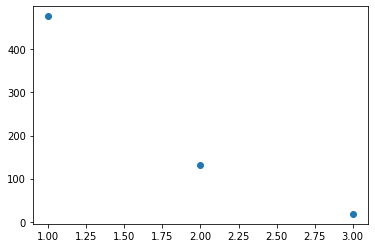

In [348]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*hist_data))


Częstość stopni wierzchołków

3-core info
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 39
Average degree:   4.3333


2-core info
Name: 
Type: Graph
Number of nodes: 149
Number of edges: 265
Average degree:   3.5570


1-core info
Name: 
Type: Graph
Number of nodes: 626
Number of edges: 742
Average degree:   2.3706




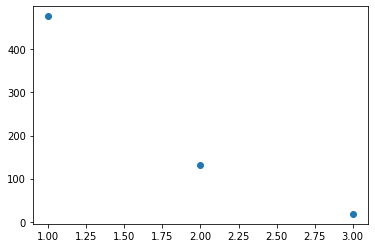

In [341]:
core_numbers = nx.core_number(G_biggest)

deg_dict = Counter(core_numbers)
degs = deg_dict.keys()
freqs = deg_dict.values()

sorted_freqs = sorted(list(dict.fromkeys(freqs)), reverse=True)

# Liczbę rdzeni o największym możliwym rzędzie, o drugim możliwie największym rzędzie o trzecim możliwie największym rzędzie; jakie to są rzędy? (3);
for i in list(sorted_freqs)[:5]:
    print(str(i) + '-core info')
    print(nx.info(nx.k_core(G_biggest, k=i)))
    print('\n')

hist_data = sorted(Counter(core_numbers.values()).items())


# rozkład stopni wierzchołków
plt.scatter(*zip(*hist_data))


3-core info
Name: 
Type: Graph
Number of nodes: 26
Number of edges: 54
Average degree:   4.1538


2-core info
Name: 
Type: Graph
Number of nodes: 262
Number of edges: 415
Average degree:   3.1679


1-core info
Name: 
Type: Graph
Number of nodes: 6811
Number of edges: 5281
Average degree:   1.5507




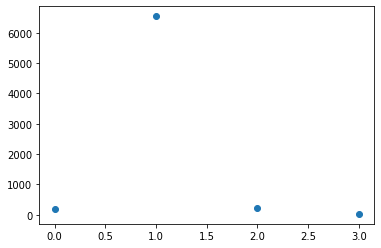

In [342]:
core_numbers1 = nx.core_number(G_multi)
for i in list(sorted_freqs)[:5]:
    print(str(i) + '-core info')
    print(nx.info(nx.k_core(G_multi, k=i)))
    print('\n')
hist_data1 = sorted(Counter(core_numbers1.values()).items())
plt.scatter(*zip(*hist_data1))

wyznacz wykładnik rozkładu potęgowego metodą regresji dla dopełnienia dystrybuanty rozkładu stopni, dla przedziałów rozlokowanych logarytmicznie (3);


In [343]:
deg_dict = Counter(dlist)
degs = deg_dict.keys()
freqs = deg_dict.values()
plt.loglog(degs, freqs, 'bo')
plt.gcf().savefig('degree_freq.png')
plt.close()

In [344]:
import scipy.stats as st

dlist = G_biggest.degree()
dlist = [elem[1] for elem in dlist]

dlist = dict(Counter(dlist))

log_dlist = dlist.keys()

print(type(log_dlist))

log_dlist = np.log10(list(dlist.keys()))
log_ylist = np.log10(list(dlist.values()))

st.linregress(log_dlist, log_ylist)

<class 'dict_keys'>


LinregressResult(slope=-1.3386952271812083, intercept=2.007638280919855, rvalue=-0.8974471120557004, pvalue=1.5118509900124536e-08, stderr=0.147135219003944)

wyznacz wykres Hilla (3).

Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan
Not enough data. Returning nan


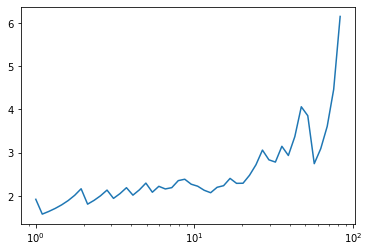

In [345]:
dlist = G_biggest.degree()
dlist = [elem[1] for elem in dlist]

NBINS = 50
bins=np.logspace(np.log10(min(dlist)),
                 np.log10(max(dlist)), num=NBINS)
bcnt, bedge=np.histogram(np.array(list(dlist)),bins=bins)
alpha=np.zeros(len(bedge[:-2]))

for i in range(0,len(bedge)-2):
    fit=powerlaw.Fit(list(dlist), xmin=bedge[i], discrete=True)
    alpha[i]=fit.alpha
    
plt.semilogx(bedge[:-2],alpha)